### 0. import raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def parser(x):
    return datetime.strptime('%Y-%m')

df0 = pd.read_excel(r"C:\Users\jenna.chang\OneDrive - Accenture\Desktop\MacroEcon_data\cci.xlsx", header=0, parse_dates=[0], index_col=0)
print(df0)

                  cci
mm-yy                
2021-01-01   98.33122
2021-02-01   99.39875
2021-03-01  100.70170
2021-04-01  101.72660
2021-05-01  102.50960
2021-06-01  102.86160
2021-07-01  102.80610
2021-08-01  102.29110
2021-09-01  101.43620
2021-10-01  100.72840
2021-11-01  100.39930
2021-12-01   99.92059
2022-01-01   98.90445
2022-02-01   97.39266
2022-03-01   95.84634
2022-04-01   94.54212
2022-05-01   93.77204
2022-06-01   93.35277
2022-07-01   93.01093
2022-08-01   92.48186
2022-09-01   92.04379
2022-10-01   92.14928
2022-11-01   92.58118
2022-12-01   92.98819
2023-01-01   93.41463
2023-02-01   94.21400
2023-03-01   95.10965
2023-04-01   96.19048
2023-05-01   97.27178


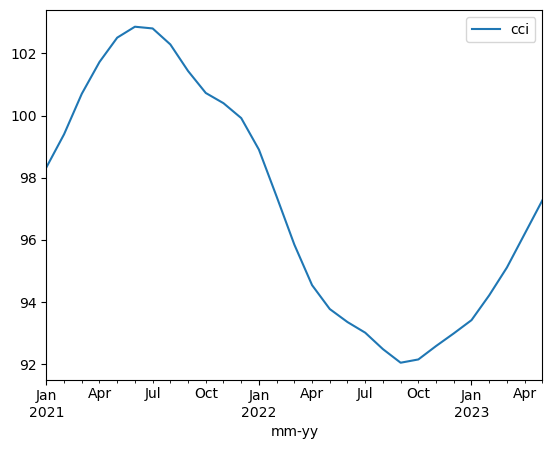

In [3]:
from matplotlib import pyplot
df0.plot()
pyplot.show()

### 1. interpolate monthly to daily data
###  1.1 constructing new data points - days

                  cci
mm-yy                
2021-01-01  98.331220
2021-01-02  98.347648
2021-01-03  98.365672
2021-01-04  98.385250
2021-01-05  98.406343
                  cci
mm-yy                
2023-04-27  97.127684
2023-04-28  97.163739
2023-04-29  97.199774
2023-04-30  97.235789
2023-05-01  97.271780
<class 'pandas.core.frame.DataFrame'>


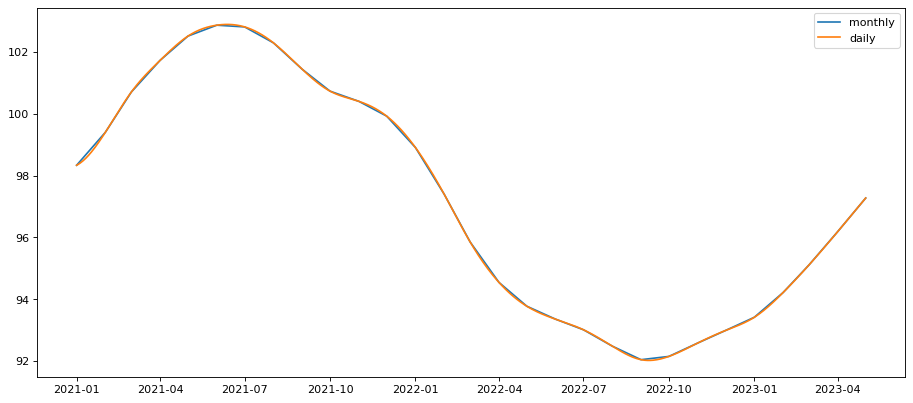

In [4]:
from scipy.interpolate import CubicSpline, interp1d
upsample_cubic = df0.resample('D').asfreq().interpolate(method='cubic', axis=0, order=2)
print(upsample_cubic.head())
print(upsample_cubic.tail())
print(type(upsample_cubic))

from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)

plt.plot(df0["cci"], label = "monthly")
plt.plot(upsample_cubic, label = "daily")
plt.legend()
plt.show()

### 2. Generate the analytical data - daily cci

In [5]:
#change date index name 
upsample_cubic.index.names = ['yyyy-mm-dd']
print(upsample_cubic.index) 

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01'],
              dtype='datetime64[ns]', name='yyyy-mm-dd', length=851, freq='D')


## 3.output daily data to a new spreadsheet

In [6]:
upsample_cubic.index = upsample_cubic.index.date
upsample_cubic.to_excel('daily - cci.xlsx')